# Lab 5 - Emsembles
The model that will be analyzed this time is Random Forests and Gradient Boosting.

## Random Forests

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import modelAnalyzesFunctions as analyzes

In [3]:
data_7: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation_7.csv', sep=',', decimal='.', index_col='id')
y_7: np.ndarray = data_7.pop('class').values
X_7: np.ndarray = data_7.values
labels_7 = pd.unique(y_7)

data_8: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation.csv', sep=',', decimal='.', index_col='id')
y_8: np.ndarray = data_8.pop('class').values
X_8: np.ndarray = data_8.values
labels_8 = pd.unique(y_8)

data_9: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation_9.csv', sep=',', decimal='.', index_col='id')
y_9: np.ndarray = data_9.pop('class').values
X_9: np.ndarray = data_9.values
labels_9 = pd.unique(y_9)

data_8.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.692855,...,0.075621,0.300582,0.105270,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.098628
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.882924,...,0.072430,0.077755,0.174381,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.040204
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.871010,...,0.147429,0.038159,0.013139,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.120303
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.781731,...,0.016141,0.161223,0.097629,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.009216
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.497109,...,0.142211,0.230036,0.117364,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.010267


In [4]:
n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25, 50]
max_features = ['sqrt', 'log2']

In [5]:
accuracy, sensitivity = analyzes.random_forest(X_8, y_8, rskf)

print("Baseline accuracy: ", accuracy)
print("Baseline sensitivity: ", sensitivity)

Baseline accuracy:  0.8218085106382977
Baseline sensitivity:  0.7641843971631205


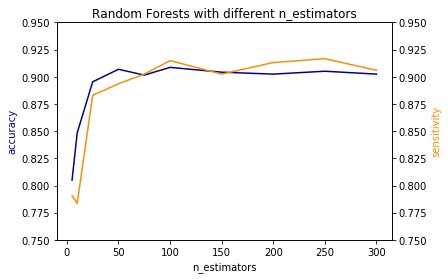

Max accuracy
Accuracy: 0.9086879432624114
Sensitivity: 0.9148936170212766
n_estimators: 100

Max sensitivity
Accuracy:  0.9051418439716312
Sensitivity: 0.916666666666667
n_estimators: 250


In [6]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, n_estimators, "n_estimators", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_n_estimators = max(accuracy, key=accuracy.get)
print('n_estimators:', best_n_estimators)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('n_estimators:', max(sensitivity, key=sensitivity.get))

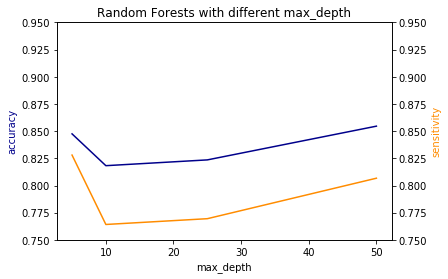

Max accuracy
Accuracy: 0.8546099290780141
Sensitivity: 0.8067375886524822
max_depth: 50

Max sensitivity
Accuracy:  0.8475177304964538
Sensitivity: 0.8280141843971632
max_depth: 5


In [7]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, max_depths, "max_depth", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_depth = max(accuracy, key=accuracy.get)
print('max_depth:', best_max_depth)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_depth:', max(sensitivity, key=sensitivity.get))

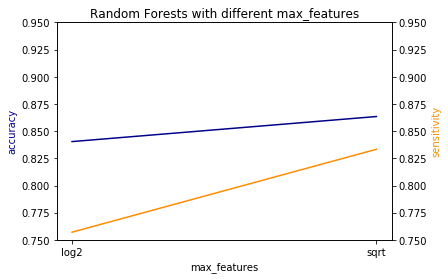

Max accuracy
Accuracy: 0.8634751773049646
Sensitivity: 0.8333333333333334
max_features: sqrt

Max sensitivity
Accuracy:  0.8634751773049646
Sensitivity: 0.8333333333333334
max_features: sqrt


In [8]:
accuracy, sensitivity = analyzes.random_forest_analyzes(X_8, y_8, max_features, "max_features", rskf)

print('Max accuracy')
print('Accuracy:', max(accuracy.values()))
print('Sensitivity:', sensitivity[max(accuracy, key=accuracy.get)])
best_max_features = max(accuracy, key=accuracy.get)
print('max_features:', best_max_features)
print()
print('Max sensitivity')
print('Accuracy: ', accuracy[max(sensitivity, key=sensitivity.get)])
print('Sensitivity:', max(sensitivity.values()))
print('max_features:', max(sensitivity, key=sensitivity.get))

In [10]:
accuracy, sensitivity = analyzes.random_forest(X_7, y_7, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.8891843971631205
Best sensitivity:  0.8865248226950356


In [9]:
accuracy, sensitivity = analyzes.random_forest(X_8, y_8, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9060283687943262
Best sensitivity:  0.9042553191489362


In [11]:
accuracy, sensitivity = analyzes.random_forest(X_9, y_9, rskf, n_estimators=best_n_estimators, max_depth=best_max_depth, max_features=best_max_features)

print("Best accuracy: ", accuracy)
print("Best sensitivity: ", sensitivity)

Best accuracy:  0.9104609929078015
Best sensitivity:  0.9007092198581562
